## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_merged = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
df_merged
# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
numofmice = df_merged["Mouse ID"].nunique()
numofmice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= df_merged.loc[df_merged.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate = df_merged.loc[df_merged["Mouse ID"] == "g989"]
mice_duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df_merged[df_merged["Mouse ID"].isin(duplicate_mice)==False]
df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = df_clean['Mouse ID'].nunique()
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#1 Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#2 mean, median, variance, standard deviation, and SEM of the tumor volume. 
#3 C.

#1- Use groupby and summary statistical methods to calculate the following properties of each drug regimen
drug_regimen = df_clean.groupby("Drug Regimen")
print(drug_regimen["Mouse ID"].count())

#2- Mean, Median, Variance, Standard Deviation, and SEM of the Tumor Volume
mean = drug_regimen["Tumor Volume (mm3)"].mean()
median = drug_regimen["Tumor Volume (mm3)"].median()
variance = drug_regimen["Tumor Volume (mm3)"].var()
standard_deviation = drug_regimen["Tumor Volume (mm3)"].std()
sem =drug_regimen["Tumor Volume (mm3)"].sem()

#3- Display the dataframe
df_regimens = pd.DataFrame({"Mean": mean,"Median":median,"Variance": variance,"Standard Deviation":standard_deviation,"SEM":sem})
df_regimens


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Number of Drug Regimens
len(drug_regimen)

10

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggregation_method = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem']).rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})
aggregation_method

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mice Tested')

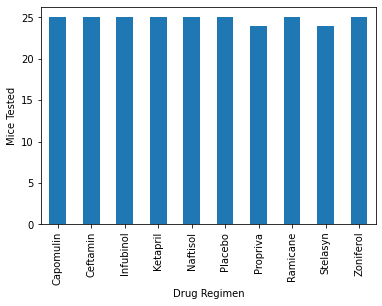

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

all_mice = df_clean.groupby(["Drug Regimen"])["Mouse ID"].nunique()
drug_reg_plot = all_mice.plot(kind="bar")
drug_reg_plot.set_ylabel("Mice Tested")

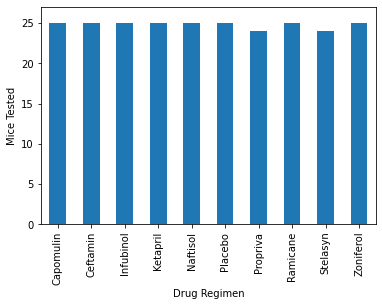

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

reg = df_clean.groupby("Drug Regimen")["Mouse ID"].nunique()
x_axis = np.arange(0, len(reg))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")
plt.xlim(-0.5, len(all_mice)-0.5)
plt.ylim(0,all_mice.max() +2)
plt.bar(reg.index, reg,align="center",width=0.5)
plt.xticks(tick_locations, reg.index,rotation="vertical")
plt.show()


Male      125
Female    123
Name: Sex, dtype: int64

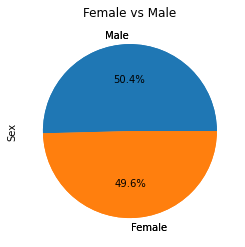

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

female_v_male = df_clean[["Mouse ID", "Sex"]].drop_duplicates()
distribution = female_v_male["Sex"].value_counts()
sexdis = distribution.plot(kind="pie", title="Female vs Male")
distribution.plot.pie(autopct= "%1.1f%%")
distribution

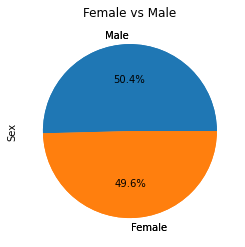

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(distribution, labels=distribution.index)
plt.title("Female vs Male")
plt.ylabel("Sex")
plot = distribution.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = df_clean.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_volume = pd.merge(df_clean, greatest_timepoint, how="inner", on=["Mouse ID", "Timepoint"])

In [53]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = results.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
#outliers
lower_out = lower_quartile - (1.5*iqr)
upper_out = upper_quartile - (1.5*iqr)
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower boundsfor drug in list_of_drugs:
for rows in drug_list:
    mice_tumor_volume = merge_volume.loc[merge_volume["Drug Regimen"]==rows]
    results = mice_tumor_volume["Tumor Volume (mm3)"]
    tumor_volume.append(results)
   
    
print (f"{rows}")
print (f"---------------")
print (f"Lower quartile of the tumor volume is: {lower_quartile}")
print (f"Upper quartile of the tumor volume is: {upper_quartile}")
print (f"Interquartile range of the tumor volume is: {iqr}")
print (f"The median value of the tumer volume is {quartiles[0.5]}")
print (f"Anything below {lower_out} can be an outlier")
print (f"Anything above {upper_out} can be an outlier\n")



Ceftamin
---------------
Lower quartile of the tumor volume is: 48.72207785
Upper quartile of the tumor volume is: 64.29983003
Interquartile range of the tumor volume is: 15.577752179999997
The median value of the tumer volume is 59.85195552
Anything below 25.355449580000002 can be an outlier
Anything above 40.93320176 can be an outlier



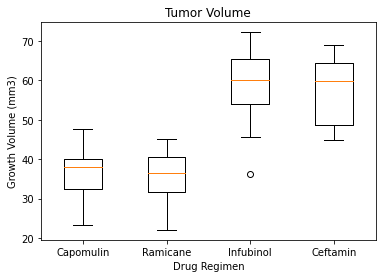

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, boxplot = plt.subplots()
boxplot.set_title('Tumor Volume')
boxplot.set_ylabel('Growth Volume (mm3)')
boxplot.set_xlabel("Drug Regimen")
boxplot.boxplot(tumor_volume, labels = drug_list)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, ' Tumor Volume vs Time Point with Capomulin')

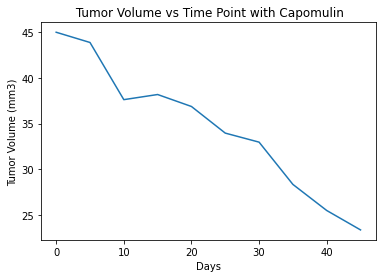

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineplot = df_merged.loc[df_merged["Mouse ID"]=="s185"]
plt.plot(lineplot["Timepoint"],lineplot["Tumor Volume (mm3)"])
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title(" Tumor Volume vs Time Point with Capomulin")